In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

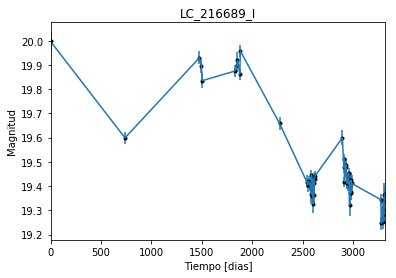

In [2]:
data = np.genfromtxt('LC_216689_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_216689_I')
plt.savefig("LC_216689_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

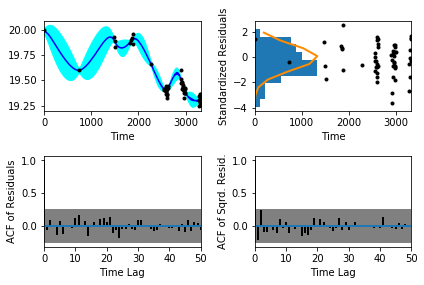

In [5]:
sample.assess_fit()

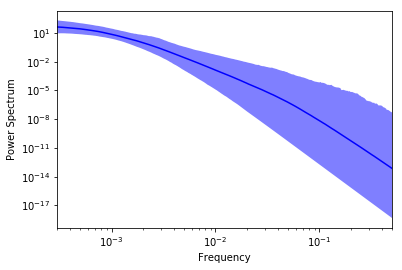

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

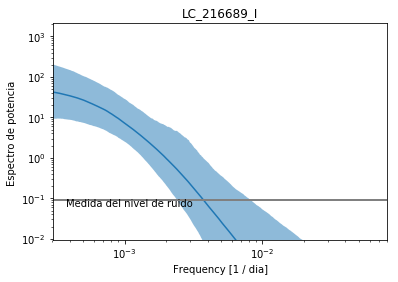

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_216689_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_216689_I')

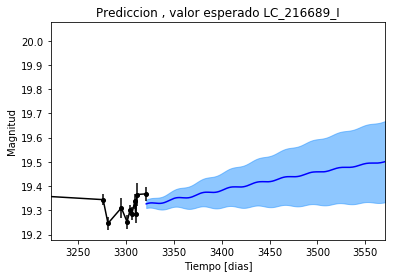

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_216689_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_216689_I')

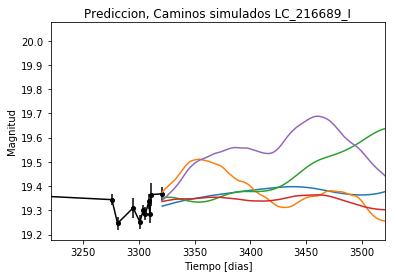

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_216689_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


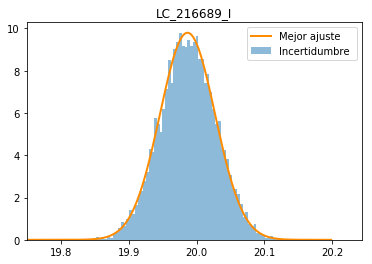

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_216689_I')
plt.savefig("Mejor_ajuste_LC_216689_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_216689_I')

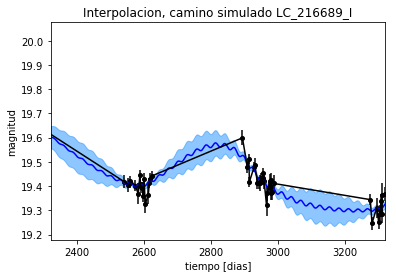

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_216689_I')

Text(0.5,1,'Interpolacion, camino simulado  LC_216689_I')

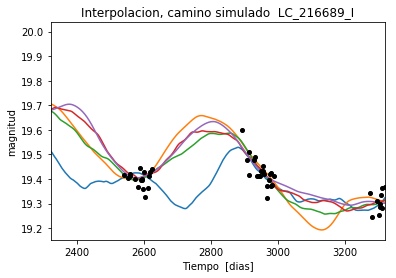

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_216689_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 375.2674054
Median: 0.00818785846794
Standard deviation: 0.190576278957
68% credibility interval: [ 0.00069787  0.15929932]
95% credibility interval: [  3.28749862e-04   7.74964671e-01]
99% credibility interval: [  3.07052756e-04   9.54852001e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 646.971553625
Median: 0.000897425633432
Standard deviation: 0.0682370763876
68% credibility interval: [ 0.00039277  0.0099536 ]
95% credibility interval: [ 0.00031136  0.16652457]
99% credibility interval: [  3.04672421e-04   4.52704739e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 540.713979289
Median: 0.0141475931454
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1608.39268654
Median: 114.847625119
Standard deviation: 1.5002349743
68% credibility interval: [ 113.19832891  115.90320884]
95% credibility interval: [ 110.80648657  116.4862141 ]
99% credibility interval: [ 108.75539873  116.86609035]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 578.963008077
Median: 0.648641659297
Standard deviation: 1.90991481128
68% credibility interval: [ 0.05678194  3.50884163]
95% credibility interval: [ 0.0136996   6.19825595]
99% credibility interval: [ 0.01002092  8.44335874]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 501.358382536
Median: 0.10517929661
Standard deviation: 6.49563700236
68% credibility interval: [ 0.00596605  2.30385329]
95% credibility interval: [  5.07879347e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19997.2007533
Median: 1.5191423754e-29
Standard deviation: 1.29346504316e+129
68% credibility interval: [  2.45442324e-60   2.38512118e-08]
95% credibility interval: [  6.34982182e-118   4.60655186e+051]
99% credibility interval: [  3.78090429e-130   2.08393086e+075]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2340.34918424
Median: 19.6874380031
Standard deviation: 0.14754051244
68% credibility interval: [ 19.56651957  19.8153461 ]
95% credibility interval: [ 19.39750502  19.98677438]
99% credibility interval: [ 19.25463054  20.176508  ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 539.368988947
Median: 0.000220439125104
Standard deviation: 0.182437200461
68% credibility interval: [ 0.          0.12370795]
95% credibility interval: [ 0.          0.74557867]
99% credibility interval: [ 0.          0.95113112]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 539.368988947
Median: 0.000220439125104
Standard deviation: 0.182437200461
68% credibility interval: [ 0.          0.12370795]
95% credibility interval: [ 0.          0.74557867]
99% credibility interval: [ 0.          0.95113112]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2197.47475756
Median: 0.0
Standard deviation: 0.000307326746927
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1608.39268654
Median: 114.847625119
Standard deviation: 1.5002349743
68% credibility interval: [ 113.19832891  115.90320884]
95% credibility interval: [ 110.80648657  116.4862141 ]
99% credibility interval: [ 108.75539873  116.86609035]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2463.34381361
Median: 0.0717196624417
Standard deviation: 0.0901196108979
68% credibility interval: [ 0.04211798  0.14066237]
95% credibility interval: [ 0.02655936  0.29938813]
99% credibility interval: [ 0.02083067  0.58487985]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1263.68466435
Median: 1.36265985496
Standard deviation: 0.206831319422
68% credibility interval: [ 1.17619294  1.58987484]
95% credibility interval: [ 1.01542708  1.82428893]
99% credibility interval: [ 0.87188452  1.93355198]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 417.962915371
Median: 2.03269172061e-05
Standard deviation: 0.0400765106093
68% credibility interval: [  4.84597052e-07   6.69018179e-04]
95% credibility interval: [  8.52960301e-56   1.33023290e-02]
99% credibility interval: [  1.54613043e-80   2.94208865e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 375.2674054
Median: (-0.051445832023-0.120912193874j)
Standard deviation: 1.65764968901
68% credibility interval: [-1.00090712+0.j         -0.00438483-0.00201965j]
95% credibility interval: [ -4.86924663e+00+0.j          -2.06559630e-03-0.86563459j]
99% credibility interval: [ -5.99951206e+00+0.j          -1.92926936e-03-0.00627452j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 646.971553625
Median: (-0.00563869155427+0.00443121578156j)
Standard deviation: 1.2238450003
68% credibility interval: [-0.06254029+0.3762283j -0.00246783+0.j       ]
95% credibility interval: [-1.04630476+0.65882148j -0.00195635+0.j        ]
99% credibility interval: [ -2.84442776e+00+1.71287165j  -1.91431328e-03+0.j        ]
Posterior summa